# Heart diseases 

Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmias) and heart defects you’re born with (congenital heart defects), among others.

## The Data

The dataset used in this article is the Cleveland Heart Disease dataset taken from the UCI repository.

 The dataset consists of 297 individuals data. There are 14 columns in the dataset, which are described below:
 >- Age: displays the age of the individual.
    >-Sex: displays the gender of the individual using the following format :
        1 = male
        0 = female
    >-Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
        0 = typical angina
        1 = atypical angina
        2 = non — anginal pain
        3 = asymptotic
    >-Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
    >-Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
    >-Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
        If fasting blood sugar > 120mg/dl then : 1 (true)
        else : 0 (false)
    >-Resting ECG : displays resting electrocardiographic results
        0 = normal
        1 = having ST-T wave abnormality
        2 = left ventricular hyperthrophy
    >-Max heart rate achieved : displays the max heart rate achieved by an individual.
    >-Exercise induced angina :
        1 = yes
        0 = no
    >-ST depression induced by exercise relative to rest: displays the value which is an integer or float.
    >-Peak exercise ST segment :
        0 = upsloping
        1 = flat
        2 = downsloping
    >-Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
    >-Thal : displays the thalassemia :
        0 = normal
        1 = fixed defect
        2 = reversible defect
    >-Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
        0 = absence
        1 = present.



## libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
##
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots #for partial plots
import shap #for SHAP values
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
df=pd.read_csv('heart_cleveland_upload.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Exploring the data

In [4]:
df.shape

(297, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

as we can see there is no null values which is pretty good 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [9]:
df2=df.copy()

change the columns names to make it more meaningful

In [10]:
df2.columns=['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']


aslo change the values of each column

In [11]:
pd.options.mode.chained_assignment = None
df2['sex'][df2['sex']==0]='Female'
df2['sex'][df2['sex']==1]='Male'
##
df2['chest_pain_type'][df2['chest_pain_type']==0]='Typical angina'
df2['chest_pain_type'][df2['chest_pain_type']==1]='Atypical angina'
df2['chest_pain_type'][df2['chest_pain_type']==2]='Non-anginal pain'
df2['chest_pain_type'][df2['chest_pain_type']==3]='Asymptomatic'
##
df2['fasting_blood_sugar'][df2['fasting_blood_sugar']==0]='Lower than 120mg/ml'
df2['fasting_blood_sugar'][df2['fasting_blood_sugar']==1]='Greater than 120mg/ml'
##
df2['rest_ecg'][df2['rest_ecg']==0]='Normal'
df2['rest_ecg'][df2['rest_ecg'] == 1] = 'ST-T wave abnormality'
df2['rest_ecg'][df2['rest_ecg'] == 2] = 'Left ventricular hypertrophy'
##
df2['exercise_induced_angina'][df2['exercise_induced_angina']==0]='No'
df2['exercise_induced_angina'][df2['exercise_induced_angina']==1]='Yes'
##
df2['st_slope'][df2['st_slope']==0]='Upsloping'
df2['st_slope'][df2['st_slope']==1]='Flat'
df2['st_slope'][df2['st_slope']==2]='Downsloping'
##
df2['thalassemia'][df2['thalassemia']==0]='Normal'
df2['thalassemia'][df2['thalassemia']==1]='Fixed defect'
df2['thalassemia'][df2['thalassemia']==2]='Reversable defect'
##
df2['condition'][df2['condition']==0]='No'
df2['condition'][df2['condition']==1]='Yes'

In [12]:
df2.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,69,Male,Typical angina,160,234,Greater than 120mg/ml,Left ventricular hypertrophy,131,No,0.1,Flat,1,Normal,No
1,69,Female,Typical angina,140,239,Lower than 120mg/ml,Normal,151,No,1.8,Upsloping,2,Normal,No
2,66,Female,Typical angina,150,226,Lower than 120mg/ml,Normal,114,No,2.6,Downsloping,0,Normal,No
3,65,Male,Typical angina,138,282,Greater than 120mg/ml,Left ventricular hypertrophy,174,No,1.4,Flat,1,Normal,Yes
4,64,Male,Typical angina,110,211,Lower than 120mg/ml,Left ventricular hypertrophy,144,Yes,1.8,Flat,0,Normal,No


In [13]:
df2.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      50
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            4
thalassemia                  3
condition                    2
dtype: int64

In [14]:
cust_palt = [
  '#ec697cff', '#339edbff', '#ffe8e5ff', '#d0edf8ff','#9fd1eeff'
]

plt.style.use('ggplot')

# # distrbution of  target varible

## Visulization 

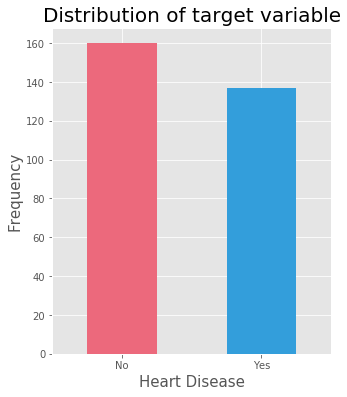

In [15]:
df2.condition.value_counts().plot(kind="bar",figsize=(5,6),color=cust_palt)
plt.title('Distribution of target variable',fontsize=20)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(rotation=0)
plt.show()

### we can see that the distrbution of the target varible is balance 

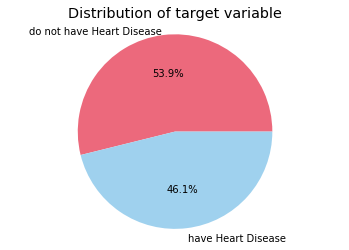

In [16]:
countNoDisease=len(df2[df2.condition=='No'])
countHaveDisease=len(df2[df2.condition=='Yes'])
task=[countNoDisease,countHaveDisease]
my_labels ='\ndo not have Heart Disease', 'have Heart Disease'
colors = ( '#ec697cff','#9fd1eeff') 
plt.pie(task,labels=my_labels,autopct='%1.1f%%',colors=colors)
plt.title('Distribution of target variable')
plt.axis('equal')
plt.show()

# we can note that the target varible is balance

### catogrical data Vs. target 

In [17]:
#selection of attrbuite 
categorical = [i for i in df2.loc[:,df2.nunique()<=10]]
continuous = [i for i in df2.loc[:,df2.nunique()>=10]]

In [18]:
cust_palt = [
  '#ec697cff', '#339edbff', '#ffe8e5ff', '#d0edf8ff','#9fd1eeff'
]

plt.style.use('ggplot')


In [19]:
#function for displaying catogrical distrbution
def catog_dis(df,cols,hue=None,rows=3,columns=3):
     fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
     axes = axes.flatten()

     for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df[i]))
        
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()
        
# # Categorical Data vs Target


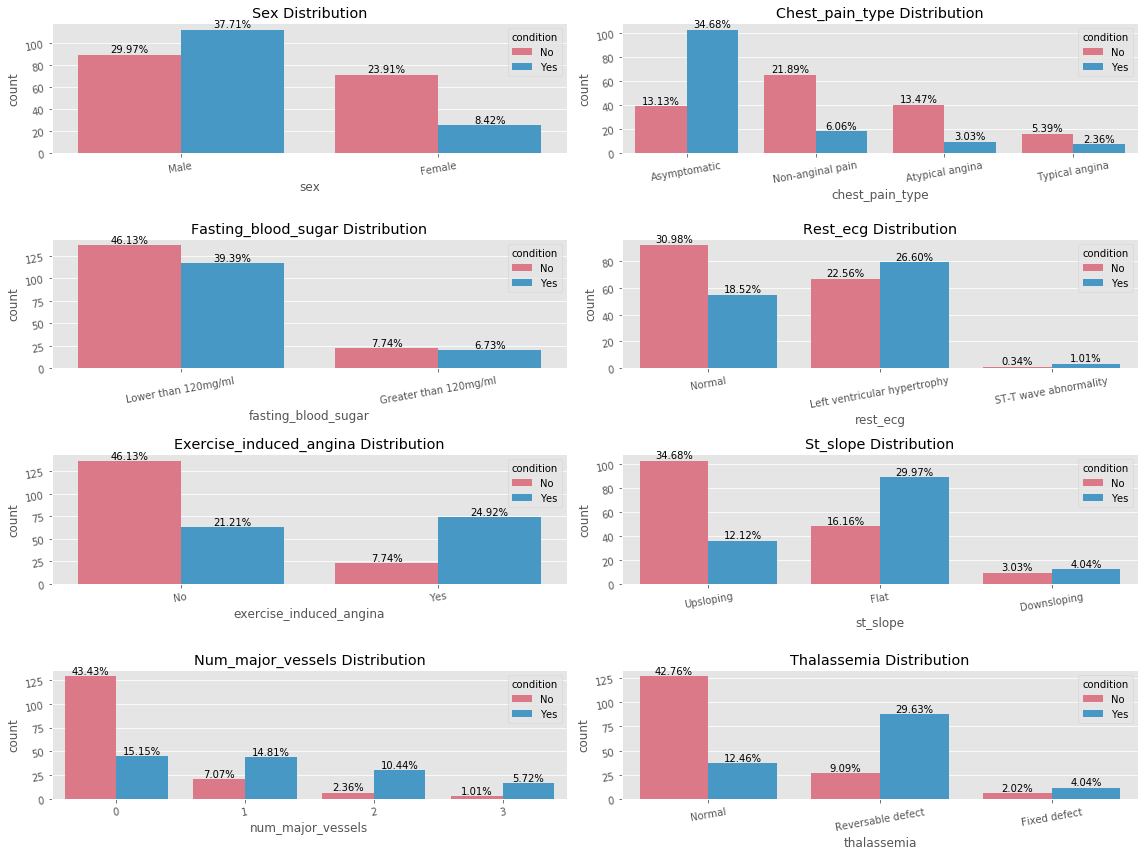

In [20]:
catog_dis(df2, categorical[:-1], 'condition', 4, 2)

### Here we can do these observations: <br>
>- Males are much more likely for heart diseases.

>- Chest pain type is very subjective and has no direct relation on the outcome, asymptomatic chest pains having highest disease outcome.

>- Blood sugar has no direct effect on the disease.

>- Rest ECG results showing no direct results but having normal ECG is pretty good sign. Even though it's pretty rare in the data, if you ST-T wave abnormality you are 3 times more likely to have heart disease.

>- Having exercise induced angina is pretty strong indicator for heartdisease, patients are almost 3 times more likely to have disease if they have exercise induced angina. Meanwhile it's less than half for not having it.

>- Patients who had flat slope distribution are more likely to have disease.

>- Number of major vessels observed seems on similar levels for patients who have disease but 0 observations is good sign for not having disease.

>- Having defected thalium test results is pretty strong indicator for heart disease.


### Numerical Data vs Target

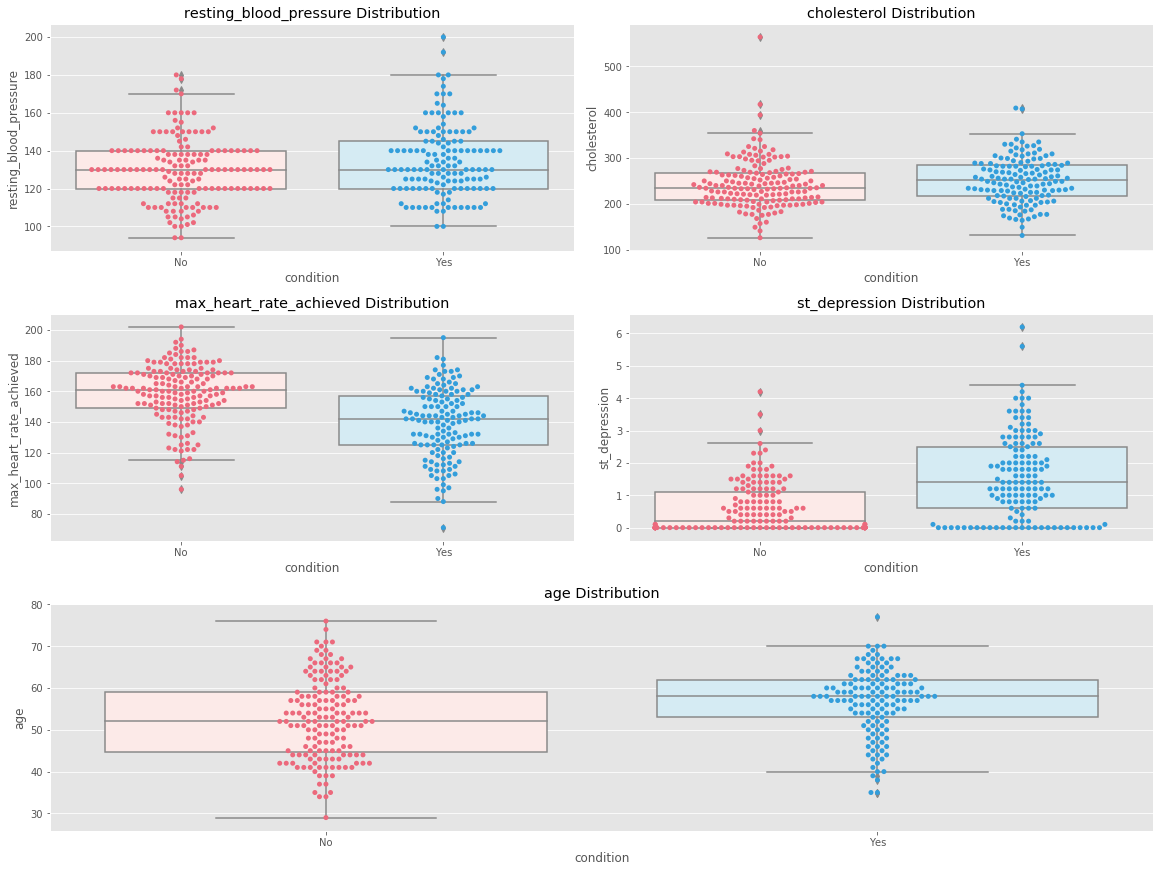

In [21]:


fig =plt.figure(constrained_layout=True, figsize=(16, 12))
grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)
#######
ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('resting_blood_pressure Distribution')

sns.boxplot(x='condition',
                    y='resting_blood_pressure',
                    data=df2,
                    palette=cust_palt[2:],
                    ax=ax1)
sns.swarmplot(x='condition',
                    y='resting_blood_pressure',
                    data=df2,
                    palette=cust_palt[:2],
                    ax=ax1)

#########
ax2 = fig.add_subplot(grid[0, 2:])

ax2.set_title('cholesterol Distribution')

sns.boxplot(x='condition',
                    y='cholesterol',
                    data=df2,
                    palette=cust_palt[2:],
                    ax=ax2)
sns.swarmplot(x='condition',
                    y='cholesterol',
                    data=df2,
                    palette=cust_palt[:2],
                    ax=ax2)
######
ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('max_heart_rate_achieved Distribution')

sns.boxplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=df2,
                    palette=cust_palt[2:],
                    ax=ax3)
sns.swarmplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=df2,
                    palette=cust_palt[:2],
                    ax=ax3)
######
ax4 = fig.add_subplot(grid[1, 2:])

ax4.set_title('st_depression Distribution')

sns.boxplot(x='condition',
                    y='st_depression',
                    data=df2,
                    palette=cust_palt[2:],
                    ax=ax4)
sns.swarmplot(x='condition',
                    y='st_depression',
                    data=df2,
                    palette=cust_palt[:2],
                    ax=ax4)
#######
ax5 = fig.add_subplot(grid[2, :])

ax5.set_title('age Distribution')

sns.boxplot(x='condition',
                    y='age',
                    data=df2,
                    palette=cust_palt[2:],
                    ax=ax5)
sns.swarmplot(x='condition',
                    y='age',
                    data=df2,
                    palette=cust_palt[:2],
                    ax=ax5)
plt.show()


### Here we can do these observations:
>- Having higher resting blood pressure shows you are little bit more likely to have heart disease.

>- Again same for Cholesterol, it's not strong indicator but patients are little bit more likely to have disease with high cholesterol. There's is also one outlier there with no disease, pretty interesting.

>- I find max heart rate distribution a bit interesting, expecting the other way around but it might be due to testing conditions and if you have normal results on ECG while exercising instructors might be increasing your excercise density?

>- It's pretty clear that heart disease likelihood increases with ST depression levels...

>- Lastly older patients are more likely to have heart disease.

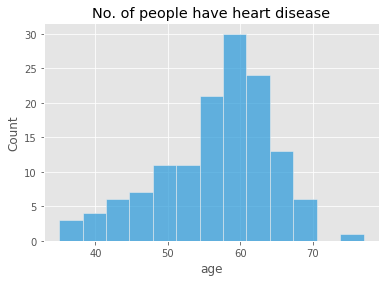

In [22]:

Deceased = df.age.where(df.condition == 1)
colors = ['#339edbff']
sns.histplot(Deceased,color=colors)
plt.title('No. of people have heart disease');



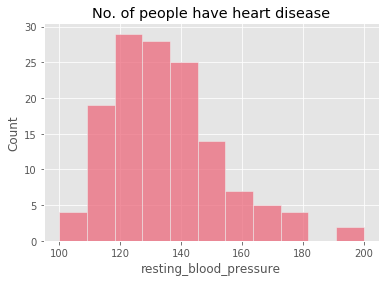

In [23]:

Deceased = df2.resting_blood_pressure.where(df2.condition =='Yes')
colors = ['#ec697cff']
sns.histplot(Deceased,color=colors)
plt.title('No. of people have heart disease');

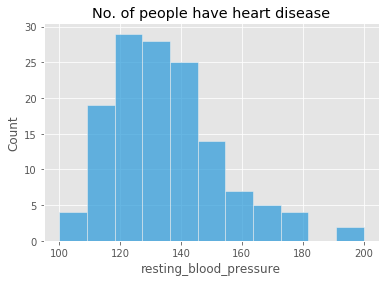

In [24]:


Deceased = df2.resting_blood_pressure.where(df2.condition =='Yes')
colors = ['#339edbff']
sns.histplot(Deceased,color=colors)
plt.title('No. of people have heart disease');
# **correlation of varibles**

### Correlation matrix :

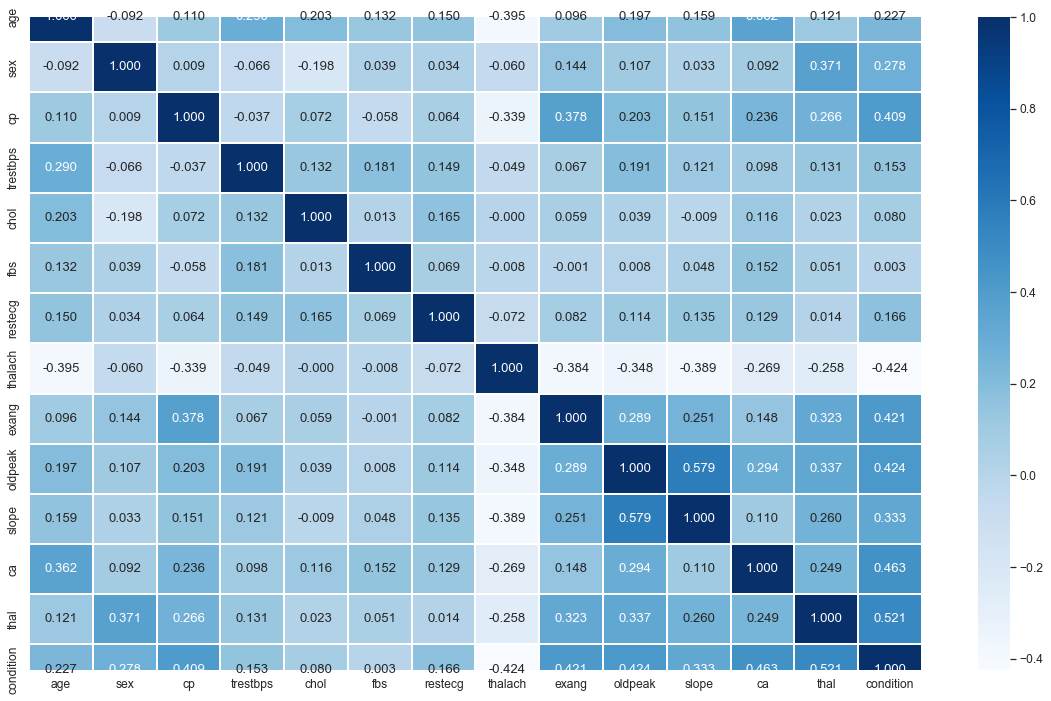

In [25]:
# Correlation heatmap between variables:
sns.set(font_scale=1.1)
correlation_train = df.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.3f',
            cmap='Blues',
            linewidths=1,
            cbar=True)

plt.show()




**note that there is no correlation higher than 0.5, therefor there is no need to delete some attrbuitr due to the correlation**

### Top correlated variables to the condition:

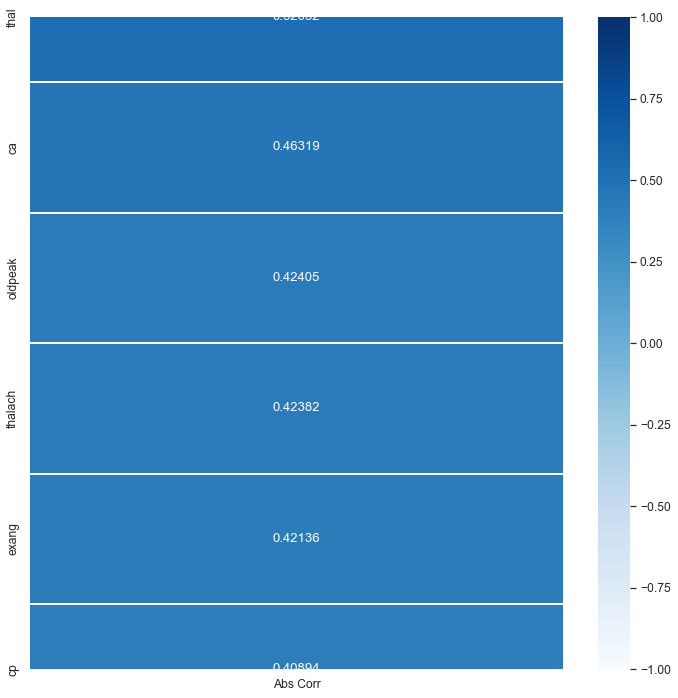

In [26]:

correlations = df.corrwith(df['condition']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.35], cmap='Blues', annot=True, vmin=-1, vmax=1,linewidths=1,fmt='.5f', ax=ax);


## Data Preprocessing

we will start off by Creating Dummy Variables using One Hot Encoding

In [27]:

a = pd.get_dummies(df["cp"], prefix="cp",drop_first=True)
b = pd.get_dummies(df["thal"], prefix="thal",drop_first=True)
c = pd.get_dummies(df["slope"], prefix="slope",drop_first=True)
d = pd.get_dummies(df["ca"], prefix="ca",drop_first=True)
e = pd.get_dummies(df["restecg"], prefix="restecg",drop_first=True)


In [28]:
frames = [df, a, b, c, d, e]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_3,thal_1,thal_2,slope_1,slope_2,ca_1,ca_2,ca_3,restecg_1,restecg_2
0,69,1,0,160,234,1,2,131,0,0.1,...,0,0,0,1,0,1,0,0,0,1
1,69,0,0,140,239,0,0,151,0,1.8,...,0,0,0,0,0,0,1,0,0,0
2,66,0,0,150,226,0,0,114,0,2.6,...,0,0,0,0,1,0,0,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,...,0,0,0,1,0,1,0,0,0,1
4,64,1,0,110,211,0,2,144,1,1.8,...,0,0,0,1,0,0,0,0,0,1


drop the columns after did the encoding

In [29]:

df = df.drop(columns=["cp", "thal", "slope","ca","restecg"])
df.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,condition,cp_1,...,cp_3,thal_1,thal_2,slope_1,slope_2,ca_1,ca_2,ca_3,restecg_1,restecg_2
0,69,1,160,234,1,131,0,0.1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,69,0,140,239,0,151,0,1.8,0,0,...,0,0,0,0,0,0,1,0,0,0
2,66,0,150,226,0,114,0,2.6,0,0,...,0,0,0,0,1,0,0,0,0,0
3,65,1,138,282,1,174,0,1.4,1,0,...,0,0,0,1,0,1,0,0,0,1
4,64,1,110,211,0,144,1,1.8,0,0,...,0,0,0,1,0,0,0,0,0,1


then, we will do some scalling on the continuous variables

In [30]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])



In [31]:

df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,condition,cp_1,...,cp_3,thal_1,thal_2,slope_1,slope_2,ca_1,ca_2,ca_3,restecg_1,restecg_2
0,1.600302,1,1.596266,-0.257179,1,-0.812095,0,-0.820813,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1.600302,0,0.468418,-0.160859,0,0.061157,0,0.639470,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.268242,0,1.032342,-0.411292,0,-1.554358,0,1.326662,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.157555,1,0.355633,0.667499,1,1.065396,0,0.295874,1,0,...,0,0,0,1,0,1,0,0,0,1
4,1.046868,1,-1.223355,-0.700254,0,-0.244481,1,0.639470,0,0,...,0,0,0,1,0,0,0,0,0,1


split the data to prepare it for ML

In [32]:

y = df.condition.values
x = df.drop(["condition"], axis=1)

creating the test and train data

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)


In [34]:

print('X_train-', x_train.size)
print('X_test-',x_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)


X_train- 4740
X_test- 1200
y_train- 237
y_test- 60


## ML Models

since the problem is classification ,we selected some common sklearn classifiers to solve it:
>- Logistic Regression
>- KNN
>- SVM
>- Naïve Bayes
>- Decision Tree
>- Random Forest


### Logistic Regression

In [35]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)

acc = lr.score(x_test, y_test) * 100

accuracies["Logistic Regression"] = acc
print("Logistic Regression Test Accuracy is {:.2f}%".format(acc))


Logistic Regression Test Accuracy is 86.67%


### KNN

we start by tunning the hyperparameter to find the best K value

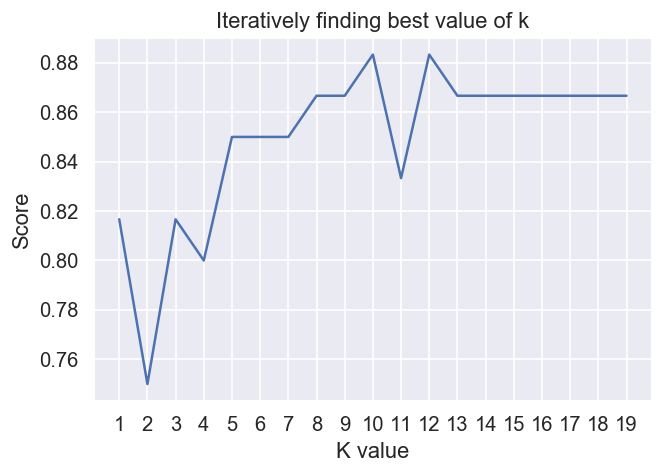

Maximum KNN Test Accuracy is 88.33%


In [36]:
# try to find best k value
scoreList = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))

plt.figure(dpi=120)
plt.plot(range(1, 20), scoreList)
plt.xticks(np.arange(1, 20, 1))
plt.title("Iteratively finding best value of k")
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList) * 100
accuracies["KNN"] = acc
print("Maximum KNN Test Accuracy is {:.2f}%".format(acc))


In [37]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} - NN Score: {:.2f}%".format(2, knn.score(x_test, y_test) * 100))


2 - NN Score: 86.67%


### SVM

In [38]:
svm = SVC()
svm.fit(x_train, y_train)

acc = svm.score(x_test, y_test) * 100
accuracies["SVM"] = acc
print("SVM Algorithm Test Accuracy is {:.2f}%".format(acc))


SVM Algorithm Test Accuracy is 83.33%


### Naïve Bayes

In [39]:
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test, y_test) * 100
accuracies["Naive Bayes"] = acc
print("Naïve Bayes Test Accuracy is {:.2f}%".format(acc))



Naïve Bayes Test Accuracy is 86.67%


### Decision Tree

we strat by tunning the hyperparameter to choose the best depth value 

In [40]:
scoreList = []
for max_d in range(1,12):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(x_train, y_train)
  print(max_d,'depth has:{:.2f}%' .format(model.score(x_test, y_test) * 100),'accurcy')



1 depth has:68.33% accurcy
2 depth has:68.33% accurcy
3 depth has:81.67% accurcy
4 depth has:80.00% accurcy
5 depth has:78.33% accurcy
6 depth has:83.33% accurcy
7 depth has:81.67% accurcy
8 depth has:85.00% accurcy
9 depth has:83.33% accurcy
10 depth has:83.33% accurcy
11 depth has:83.33% accurcy


In [41]:

dtc = DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=42)
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test) * 100
accuracies["Decision Tree"] = acc
print("Decision Tree Test Accuracy is {:.2f}%".format(acc))

Decision Tree Test Accuracy is 85.00%


### Random Forest

In [42]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)

acc = rf.score(x_test, y_test) * 100
accuracies["Random Forest"] = acc
print("Random Forest Algorithm Test Accuracy is {:.2f}%".format(acc))


Random Forest Algorithm Test Accuracy is 83.33%


## Model peformance

<Figure size 720x480 with 0 Axes>

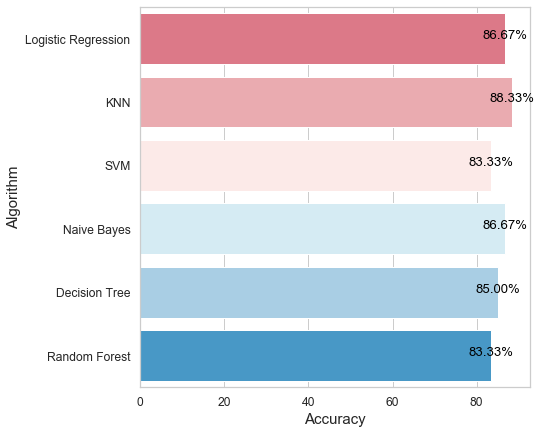

In [43]:
colors = ["#ec697cff", "#f5a0a7ff", "#ffe8e5ff", "#d0edf8ff","#9fd1eeff", "#339edbff"]

sns.set_style("whitegrid")
plt.figure(dpi=120)
plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Algorithm",fontsize=15)
plt.xlabel("Accuracy",fontsize=15)
g = sns.barplot(y=list(accuracies.keys()), x=list(accuracies.values()), palette=colors, orient="h")
i = 0
for algorithm, accuracy in accuracies.items():
    g.text(accuracy, i, "{0:.2f}%".format(accuracy), color="black", ha="center")
    i += 1
plt.show()

In [44]:
# Predicted values
y_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
y_knn = knn3.predict(x_test)
y_svm = svm.predict(x_test)
y_nb = nb.predict(x_test)
y_dtc = dtc.predict(x_test)
y_rf = rf.predict(x_test)


In [45]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_lr)
cm_knn = confusion_matrix(y_test, y_knn)
cm_svm = confusion_matrix(y_test, y_svm)
cm_nb = confusion_matrix(y_test, y_nb)
cm_dtc = confusion_matrix(y_test, y_dtc)
cm_rf = confusion_matrix(y_test, y_rf)


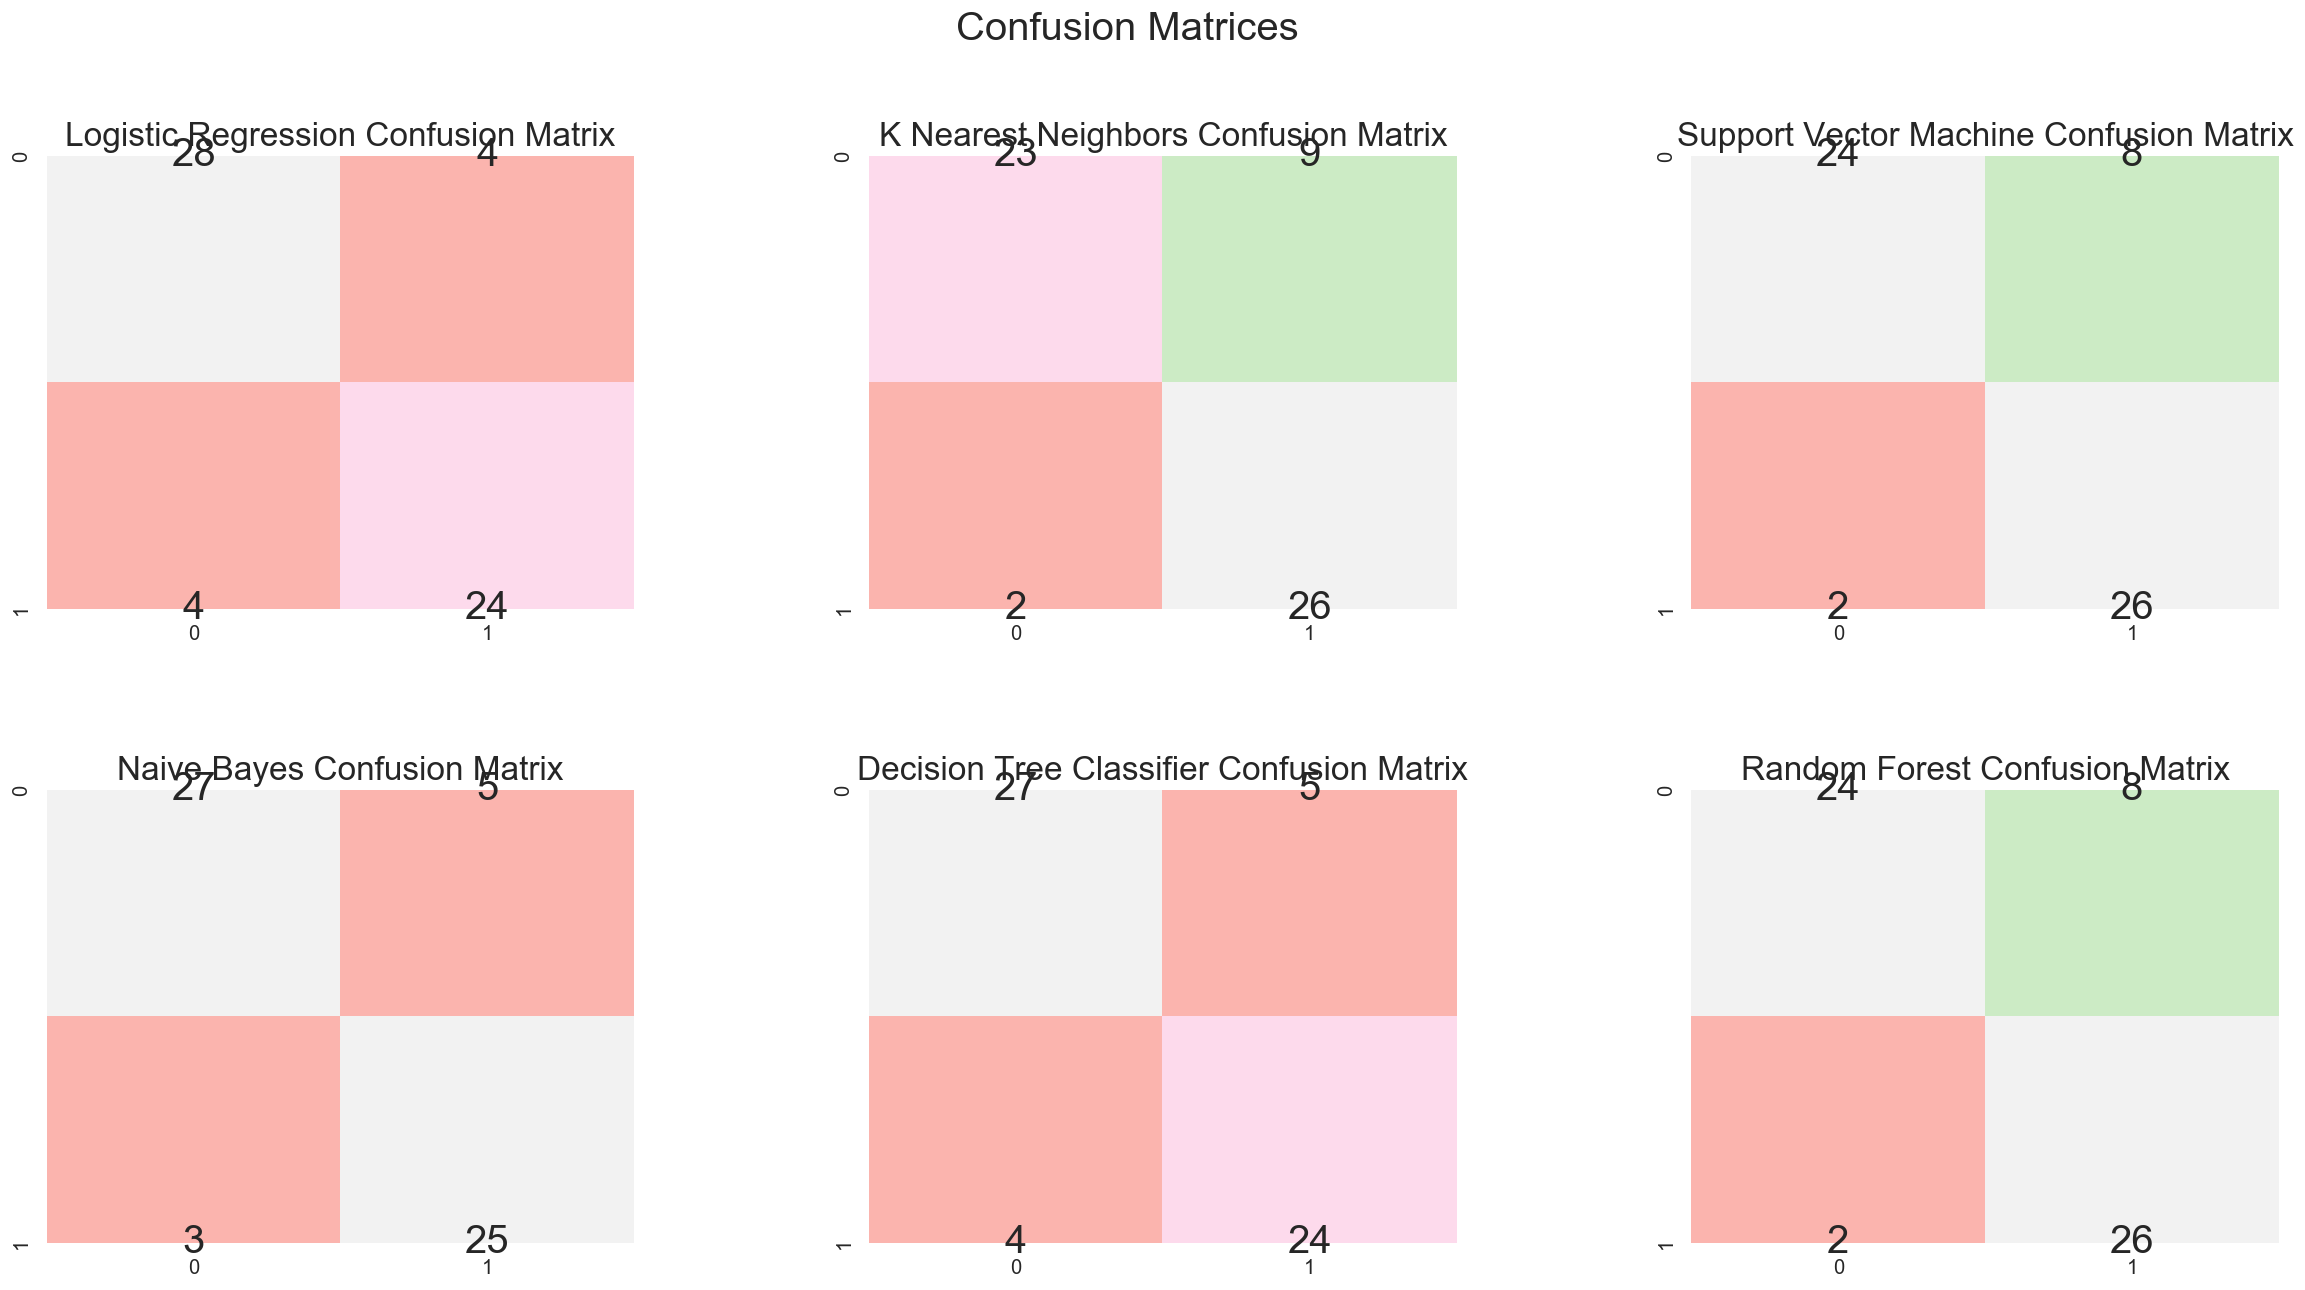

In [46]:
plt.figure(figsize=(24, 12), dpi=120)

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 3, 1)
plt.title("Logistic Regression Confusion Matrix",fontsize=20)
sns.heatmap(
    cm_lr, annot=True, cmap="Pastel1", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 2)
plt.title("K Nearest Neighbors Confusion Matrix",fontsize=20)
sns.heatmap(
    cm_knn, annot=True, cmap="Pastel1", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 3)
plt.title("Support Vector Machine Confusion Matrix",fontsize=20)
sns.heatmap(
    cm_svm, annot=True, cmap="Pastel1", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 4)
plt.title("Naive Bayes Confusion Matrix",fontsize=20)
sns.heatmap(
    cm_nb, annot=True, cmap="Pastel1", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 5)
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=20)
sns.heatmap(
    cm_dtc, annot=True, cmap="Pastel1", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.subplot(2, 3, 6)
plt.title("Random Forest Confusion Matrix",fontsize=20)
sns.heatmap(
    cm_rf, annot=True, cmap="Pastel1", fmt="d", cbar=False, annot_kws={"size": 24}
)

plt.show()

## The Explanation

### after applying ML we should answer the question what caused heart disease ?

here we used slightly diffrent data ( an updated one ) to gives us more meaningful answers 

In [52]:
df4=pd.read_csv('heart.csv')

In [53]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [54]:
dt=df4.copy()

In [55]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [56]:
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

In [57]:
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [58]:
dt['sex'] = dt['sex'].astype('object')
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
dt['rest_ecg'] = dt['rest_ecg'].astype('object')
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
dt['st_slope'] = dt['st_slope'].astype('object')
dt['thalassemia'] = dt['thalassemia'].astype('object')

In [59]:
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [60]:
dt = pd.get_dummies(dt, drop_first=True)

In [61]:
dt.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
3,61,148,203,161,0.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size = .2, random_state=10) #split the data

In [63]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [64]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [65]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [66]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[ 84,  13],
       [  6, 102]], dtype=int64)

**Permutation importance** is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy. 


In [69]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0546 ± 0.0311,num_major_vessels
0.0332 ± 0.0226,st_depression
0.0293 ± 0.0062,age
0.0254 ± 0.0143,cholesterol
0.0244 ± 0.0254,exercise_induced_angina_yes
0.0205 ± 0.0156,chest_pain_type_atypical angina
0.0195 ± 0.0123,thalassemia_fixed defect
0.0176 ± 0.0078,chest_pain_type_non-anginal pain
0.0166 ± 0.0146,thalassemia_reversable defect
0.0156 ± 0.0168,max_heart_rate_achieved


So, it looks like the most important factors in terms of permutation is a 'num_major_vessels' . The high importance of chest_pain_type_atypical angina' type makes sense, as this is the immediate, subjective state of the patient at the time of examination (as opposed to, say, age, which is a much more general factor).

Let's take a closer look at the number of major vessles using a Partial Dependence Plot. These plots vary a single variable in a single row across a range of values and see what effect it has on the outcome. It does this for several rows and plots the average effect. Let's take a look at the 'num_major_vessels' variable, which was at the top of the permutation importance list,

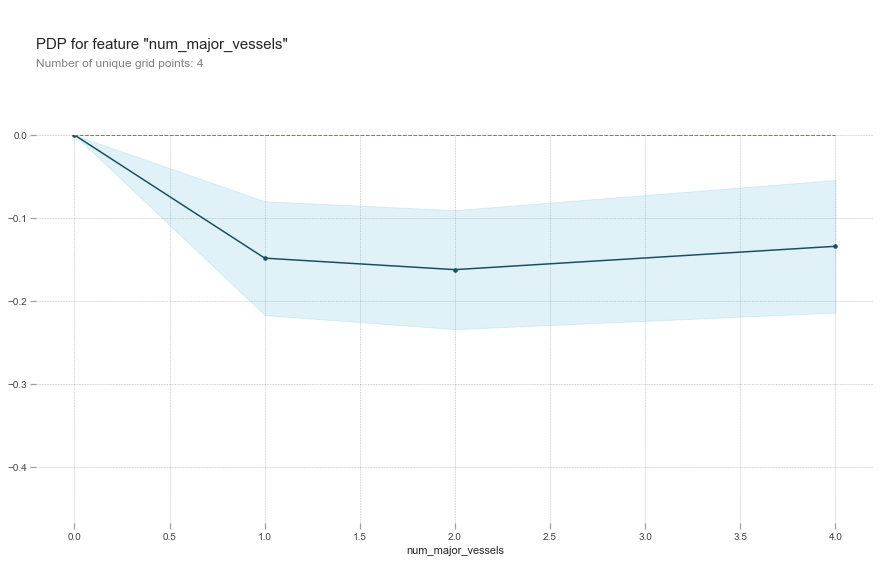

In [70]:
base_features = dt.columns.values.tolist()
base_features.remove('target')

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

we can see that as the number of major blood vessels increases, the probability of heart disease decreases. That makes sense, as it means more blood can get to the heart.

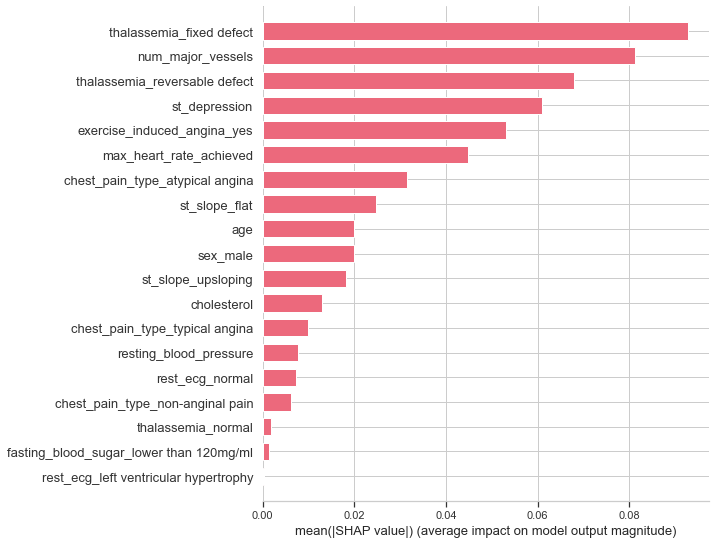

In [146]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
colors = ['#ec697cff']
shap.summary_plot(shap_values[1], X_test, plot_type="bar",color=colors)

Next, let's pick out individual patients and see how the different variables are affecting their outcomes,

In [71]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [72]:
data_for_prediction = X_test.iloc[-1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

For this person, their prediction is 81% . alot of things **Not** working in their favour things like having no major vessels, and not a reversible thalassemia defect.

In [73]:
data_for_prediction = X_test.iloc[2,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

For this person, their prediction is 18%. Many things are working in their favour, including having a major vessel